In [47]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import cycle


In [48]:
NEURAL_NETWORKS = [ 'DenseNet201',
                    'MobileNetV2',
                    'InceptionV3', 
                    "ResNet50", 
                    'GradientBoosting', 
                    'KNN', 
                    'NBayes', 
                    "RandomForest",
                    'f_GradientBoosting', 
                    'f_KNN', 
                    'f_NBayes', 
                    "f_RandomForest"]
pre_name = "ml_dl_f"
path_project = Path().absolute().parent.parent.parent
results_path = path_project / "6_resultados"


In [49]:
main_pd = pd.DataFrame()
pds = []
for network in NEURAL_NETWORKS:
    output_file = results_path / 'analitycs' / 'by_train' / '_pre_plot' / f'{network}_result_for_analytic.csv'
    readed = pd.read_csv(output_file)
    pds.append(readed)

main_pd = pd.concat(pds)
NEURAL_NETWORKS = main_pd['model'].unique()

In [50]:
main_pd

,subset,model,runtime,val_runtime,total_runtime,accuracy_mean,accuracy_median,accuracy_lower,accuracy_upper,accuracy_lower_whisker,...,val_npv_lower,val_npv_upper,val_npv_lower_whisker,val_npv_upper_whisker,val_mcc_mean,val_mcc_median,val_mcc_lower,val_mcc_upper,val_mcc_lower_whisker,val_mcc_upper_whisker
0,5,DenseNet201,467.739306,35.522848,503.262154,88.970499,89.120725,88.603845,89.507118,87.248936,...,88.133702,89.650129,85.859061,91.924769,77.908019,78.168240,76.256460,79.326965,71.650703,83.932722
1,10,DenseNet201,475.985508,34.561122,510.546630,92.279468,92.424217,91.860193,92.935079,90.247864,...,91.085295,92.136776,89.508074,93.713998,83.225301,83.279902,82.208636,84.141460,79.309401,87.040696
2,15,DenseNet201,420.784925,33.697944,454.482868,94.174657,94.386494,93.465680,94.962670,91.220195,...,92.236672,93.456696,90.406637,95.286731,85.831933,85.782486,84.708303,87.010038,81.255701,90.462640
3,20,DenseNet201,396.361161,32.469169,428.830330,95.789815,95.967811,94.663550,96.930285,91.263448,...,93.452623,94.506344,91.872042,96.086925,88.085852,88.102236,87.068547,89.065021,84.073836,92.059732
4,25,DenseNet201,393.050342,31.252430,424.302772,97.233779,97.551546,96.322472,98.444179,93.139913,...,94.726448,95.380855,93.744837,96.362465,90.034286,90.106604,89.345516,90.792887,87.174460,92.963943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,80,f_RandomForest,37.696129,0.030340,37.726469,99.668201,100.000000,99.175362,100.000000,97.938405,...,84.848485,93.103448,72.466040,105.485893,81.518687,80.720735,76.709295,86.859904,61.483382,102.085817
16,85,f_RandomForest,29.866930,0.018898,29.885828,99.593403,100.000000,99.141703,100.000000,97.854258,...,84.848485,90.696022,76.077178,99.467329,81.328606,80.720735,76.321364,86.859904,60.513555,102.667713
17,90,f_RandomForest,30.903964,0.018707,30.922671,99.570009,99.983171,99.124874,100.000000,97.812184,...,83.870967,90.696022,73.633385,100.933605,79.935708,80.178373,73.994007,86.666667,54.985018,105.675656
18,95,f_RandomForest,34.437769,0.027766,34.465535,99.693368,100.000000,99.158532,100.000000,97.896331,...,85.182709,93.103448,73.301601,104.984556,80.391543,82.050202,76.243351,86.666667,60.608378,102.301640


In [51]:

# Combinando todos os valores de ROIs
full_rois = np.unique(np.concatenate([main_pd['subset']]))
range_rois =  np.arange(5, 100, 10)


In [52]:
def plot_comparison(main_pd, attribute, attribute_title, title, xlabel, xticks, figsize=(7, 3), yticks=None, legend_per_row=6):
    """
    Função para plotar comparações de um atributo específico entre diferentes arquiteturas de CNN.
    Também exporta os dados para arquivos .dat para cada métrica.

    :param main_pd: DataFrame contendo todos os dados.
    :param attribute: Atributo a ser plotado (string).
    :param title: Título do gráfico.
    :param xlabel: Rótulo do eixo X.
    :param xticks: Marcas do eixo X.
    :param figsize: Tamanho da figura do gráfico.
    :param yticks: Marcas do eixo Y (opcional).
    :param legend_per_row: Número de legendas por linha na legenda.
    """
    
    # Definir os grupos e suas cores (mesmo esquema de cores usado no boxplot)
    color_map = {
        'InceptionV3': '#1f77b4',      # Azul
        'MobileNetV2': '#1f77b4',      # Azul
        'DenseNet201': '#1f77b4',      #
        'ResNet50': '#1f77b4',         # 
        'KNN': '#ff7f0e',              # 
        'RandomForest': '#ff7f0e',     # 
        'NBayes': '#ff7f0e',           #
        'GradientBoosting': '#ff7f0e',
        'f_KNN': '#2ca02c',             # Verde
        'f_NBayes': '#2ca02c',          # Verde
        'f_RandomForest': '#2ca02c',    # Verde
        'f_GradientBoosting': '#2ca02c' # Verde
    }

    # Definir marcadores
    markers = ['o', 's', 'D', '^', 'v', 'P', 'X', 'p', '*', 'h', 'H', 'd']
    marker_iter = iter(markers)

    # Configurar figura
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(font_scale=1.2)
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    sns.despine()

    # Iterar sobre as redes (NEURAL_NETWORKS) e plotar os dados com as cores dos grupos
    for network in NEURAL_NETWORKS:
        network_data = main_pd[main_pd['model'] == network]
        x = network_data['subset']
        y = network_data[attribute]
        marker = next(marker_iter)
        
        # Plotar cada linha de rede
        ax.plot(x, y, label=network, marker=marker, linestyle='--', linewidth=2.5, markersize=8, color=color_map[network])

    # Configurações de título, eixos e ticks
    ax.set_title(title, fontsize=14, pad=10)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(attribute_title, fontsize=16)
    ax.set_xticks(xticks)

    # Ajuste automático dos yticks
    if yticks is None:
        min_value = main_pd[attribute].min()
        max_value = main_pd[attribute].max()
        step = (max_value - min_value) / 8  # Ajustar para um número razoável de divisões
        ax.set_yticks(np.round(np.arange(min_value, max_value + step, step), 2))
    else:
        ax.set_yticks(yticks)

    # Linhas de grade suaves
    ax.grid(True, which='major', linestyle='--', linewidth=1.0, alpha=0.9)

    # Legenda organizada abaixo do gráfico
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0.5, -0.1), loc='upper center', fontsize='small', 
              title_fontsize='small', ncol=legend_per_row, labelspacing=0.5, handletextpad=0.1,
                columnspacing=1.0, borderpad=0.5, frameon=False)
    

    # Ajustar automaticamente as margens para que o gráfico ocupe mais espaço
    plt.subplots_adjust(top=1.6, bottom=0.25, left=0.1, right=1.5, hspace=0.8, wspace=0.8)
    

    # Verifica se a pasta de gráficos existe, senão cria
    graphics_path = results_path / 'analitycs' / 'by_train' / 'graphics'
    if not os.path.exists(graphics_path):
        os.makedirs(graphics_path)
   
    plt.savefig(graphics_path / f"{pre_name}_{attribute}.svg", format='svg', dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()


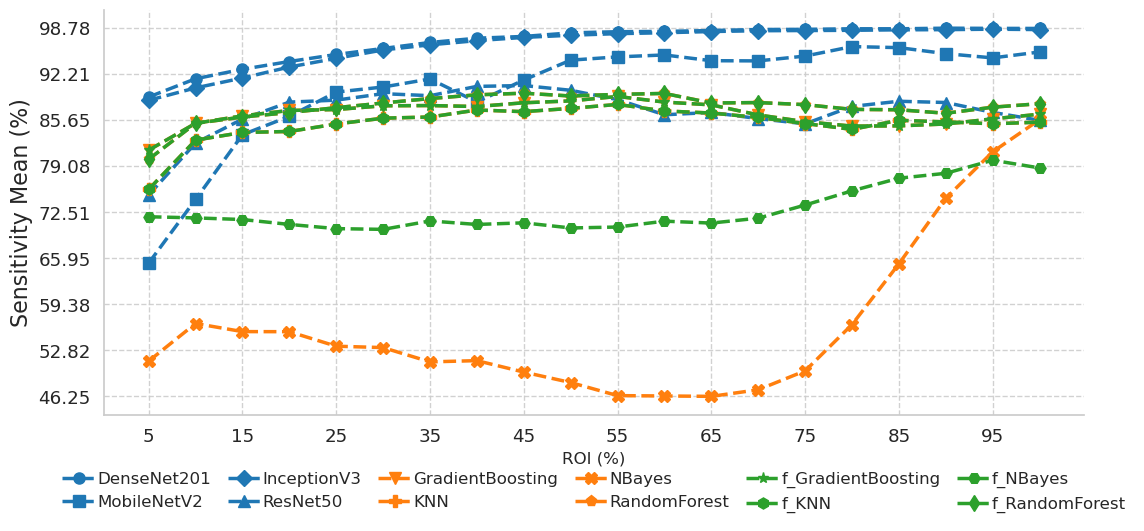

In [53]:
plot_comparison(main_pd, 'val_sensitivity_mean', 'Sensitivity Mean (%)','', 'ROI (%)', range_rois)

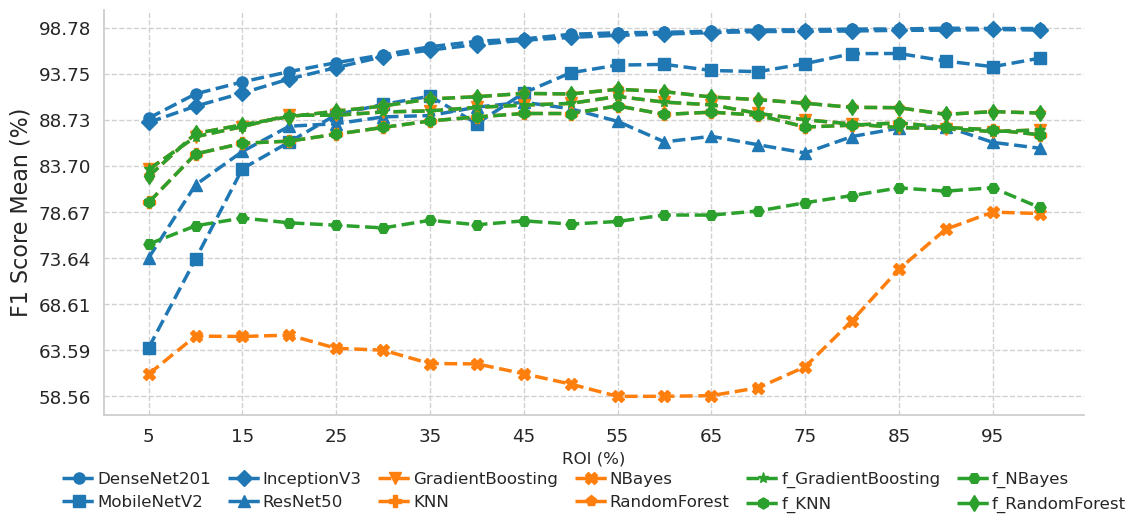

In [54]:
plot_comparison(main_pd, 'val_f1_score_mean', 'F1 Score Mean (%)','', 'ROI (%)', range_rois)


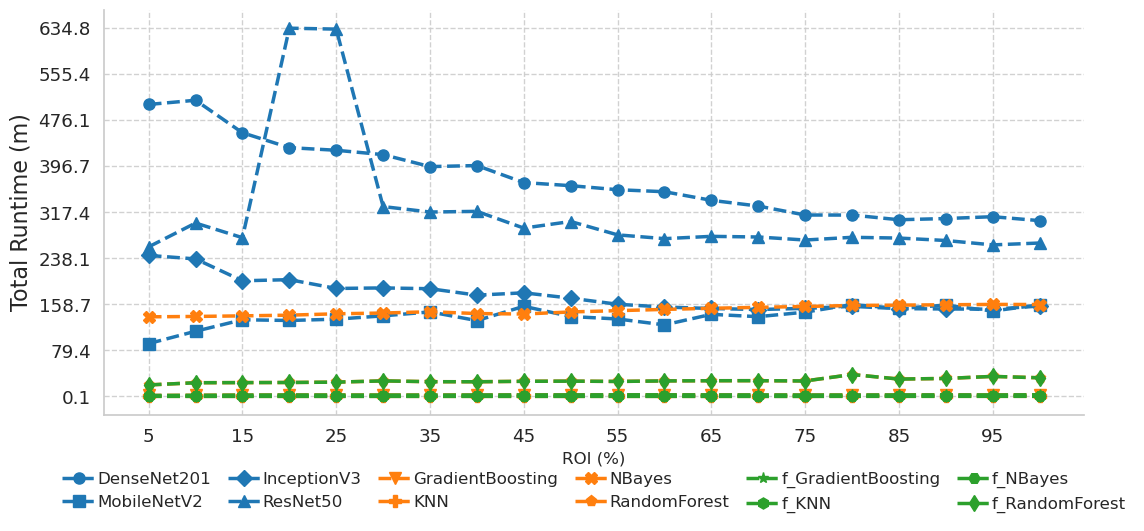

In [55]:
# Valores para os ticks do eixo Y
range_time = np.arange(40, 360, 30)

plot_comparison(main_pd, 'total_runtime', 'Total Runtime (m)', '', 'ROI (%)', range_rois, legend_per_row=6)


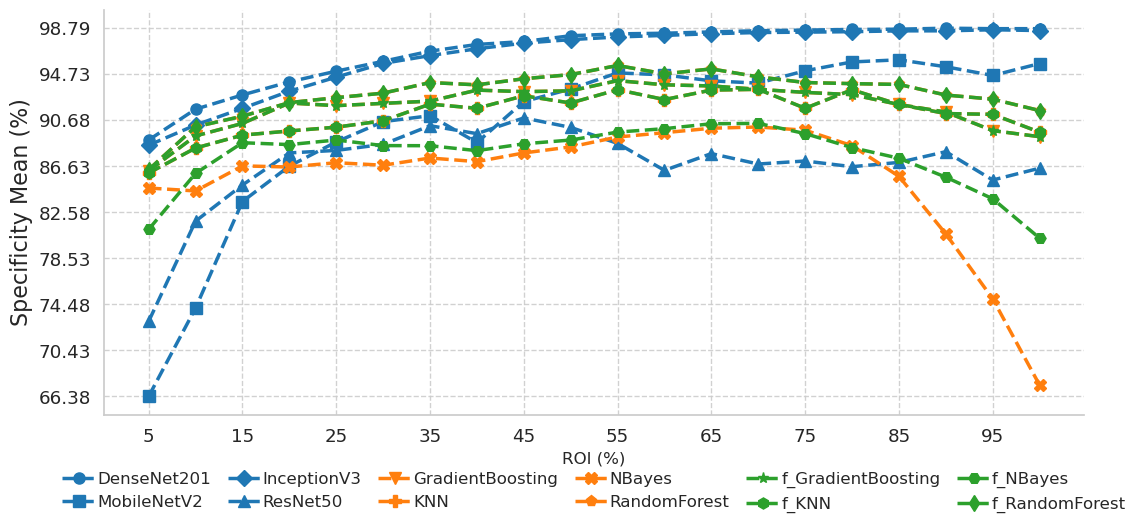

In [56]:

plot_comparison(main_pd, 'val_specificity_mean', "Specificity Mean (%)",'', 'ROI (%)', range_rois)


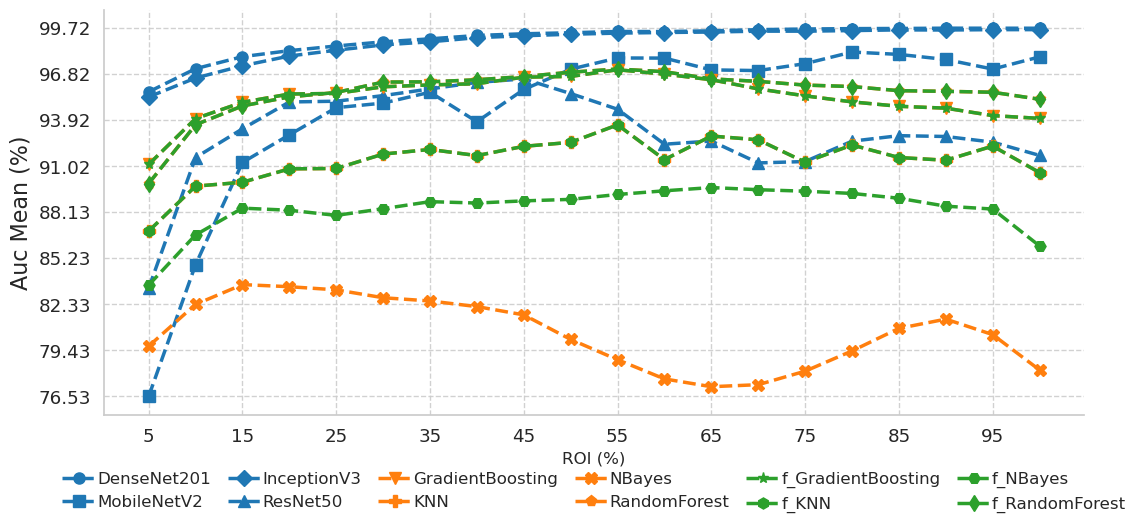

In [57]:
plot_comparison(main_pd, 'val_auc_mean', 'Auc Mean (%)','', 'ROI (%)', range_rois)


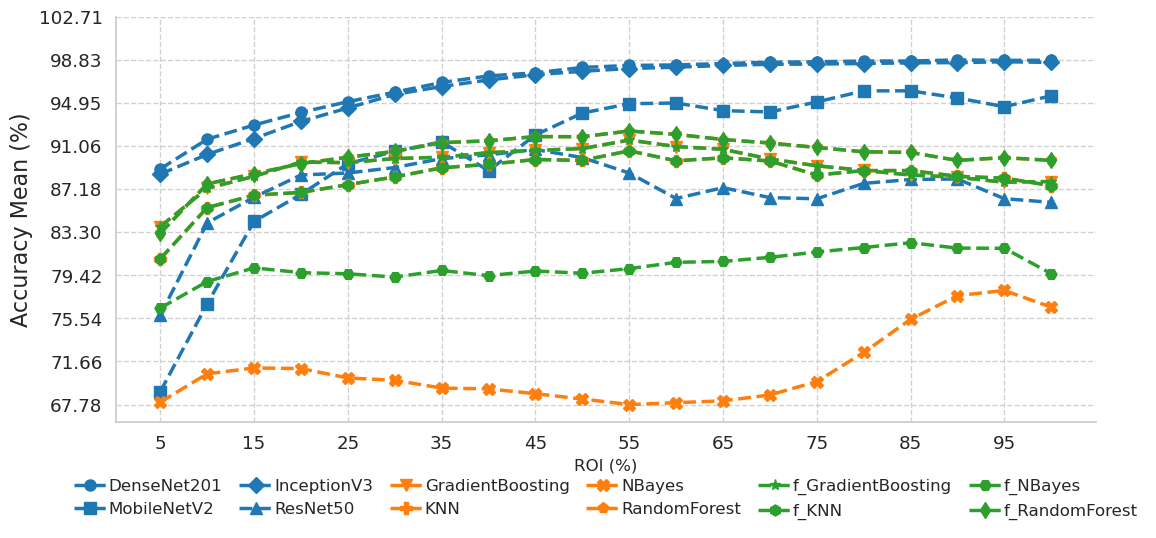

In [58]:
plot_comparison(main_pd, 'val_accuracy_mean', 'Accuracy Mean (%)', '', 'ROI (%)', range_rois)

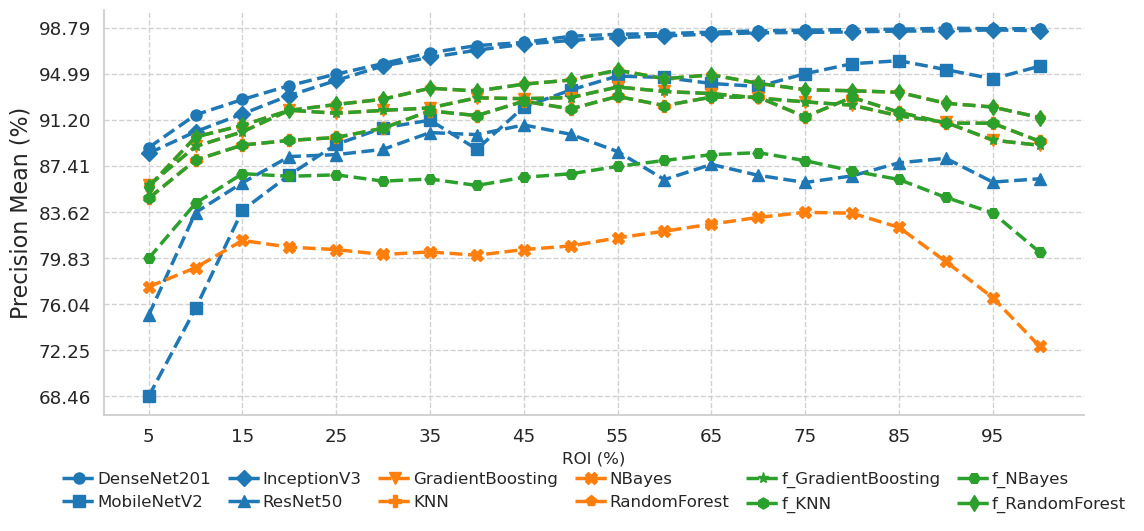

In [59]:
plot_comparison(main_pd, 'val_precision_mean', 'Precision Mean (%)','', 'ROI (%)', range_rois)

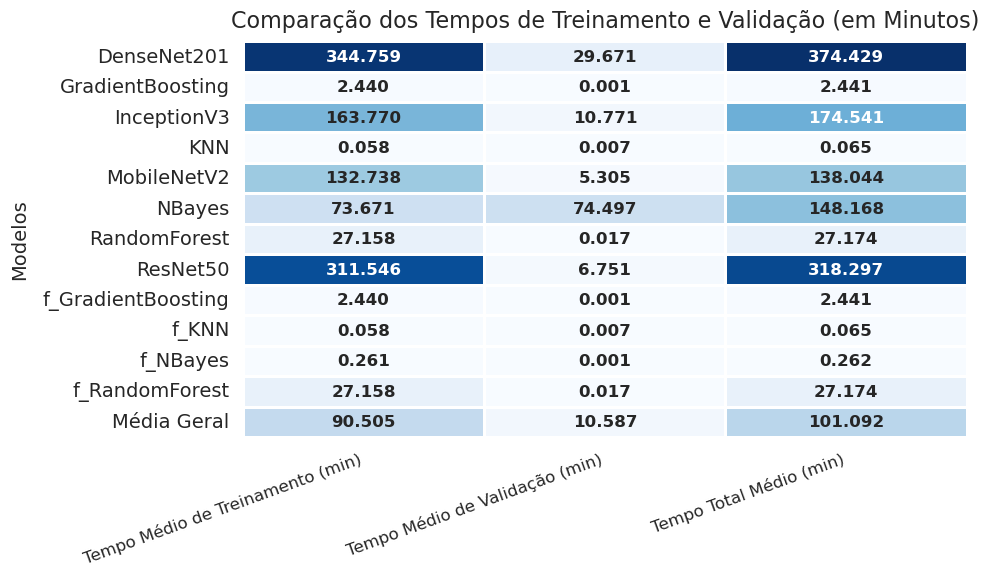

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Calcular tempo médio para treinamento, validação e tempo total (em minutos)
train_time = (main_pd.groupby('model')['total_runtime'].mean() - main_pd.groupby('model')['val_runtime'].mean()).round(3)
val_time = main_pd.groupby('model')['val_runtime'].mean().round(3)
total_time = main_pd.groupby('model')['total_runtime'].mean().round(3)

# Calcular médias gerais
avg_train_time = train_time.mean().round(3)
avg_val_time = val_time.mean().round(3)
avg_total_time = total_time.mean().round(3)

# Criar a tabela de comparação
time_comparison = pd.concat([train_time, val_time, total_time], axis=1)
time_comparison.columns = [
    'Tempo Médio de Treinamento (min)',
    'Tempo Médio de Validação (min)',
    'Tempo Total Médio (min)'
]

# Adicionar uma linha com a média geral
time_comparison.loc['Média Geral'] = [
    avg_train_time,
    avg_val_time,
    avg_total_time
]

# Melhorar a visualização
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Heatmap com cores suaves e anotações
heatmap = sns.heatmap(
    time_comparison,
    annot=True,
    fmt=".3f",
    cmap='Blues',
    linewidths=1,
    cbar=False,
    linecolor='white',
    annot_kws={"size": 12, "weight": "bold"},
    square=False,
    robust=True
)

# Ajustar rótulos dos eixos
heatmap.set_title('Comparação dos Tempos de Treinamento e Validação (em Minutos)', fontsize=16, pad=10)
heatmap.set_ylabel('Modelos', fontsize=14, labelpad=10)  # Definir o rótulo do eixo Y como "Modelos"

# Rotacionar os rótulos do eixo X e ajustar o eixo Y
plt.xticks(rotation=20, ha='right', fontsize=12)
plt.yticks(fontsize=14)
plt.tight_layout()

# Verificar e criar o diretório para salvar o gráfico
graphics_path = results_path / 'analitycs' / 'by_train' / 'graphics'
os.makedirs(graphics_path, exist_ok=True)

# Salvar a figura
plt.savefig(graphics_path / f'{pre_name}_time_comparison.svg', format='svg', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Exibir o gráfico
plt.show()

